# 1. Project Objective

The goal of our project is to predict when a failure will occur for maintenance. For M2 we will have used a linear regression model, random forest and decision tree model for prediction. We will also evaluate them against each other to identify which is the most accurate.


Group 5 Members:
   - Abhinav Bisht
   - Brian Blades
   - Joshua Seeb

# 2. Data Collected

In [0]:
%sh 
rm /databricks/driver/predictive_maintenance.csv?dl=0

In [0]:
%sh
wget 'https://www.dropbox.com/s/0knjbhy6y056jqf/predictive_maintenance.csv?dl=0'

--2021-12-11 02:39:35--  https://www.dropbox.com/s/0knjbhy6y056jqf/predictive_maintenance.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/0knjbhy6y056jqf/predictive_maintenance.csv [following]
--2021-12-11 02:39:35--  https://www.dropbox.com/s/raw/0knjbhy6y056jqf/predictive_maintenance.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc870cb82bd4d117fac093c6fd6.dl.dropboxusercontent.com/cd/0/inline/BbnG01g9PvS8Fr5bfziFbiSdcQLnR-jGuWnvpmijqkt3JTLTfwvfrX0VOz9qjV_I62vD41YSg67PLdMbof4DVKDiDc1kmZQ8IXM_z1E_jZ79y1X9OoyDdDBw4pVcp-n4DMJy2ziEqlEtBYvsSaPxAF3Z/file# [following]
--2021-12-11 02:39:35--  https://ucc870cb82bd4d117fac093c6fd6.dl.dropboxusercontent.com/cd/0/inline/BbnG01g9PvS8Fr5bfziFbiSdcQLnR-jGuWnvpmijqkt

Data lineage - the data comes from Kaggle (https://www.kaggle.com/shivamb/machine-predictive-maintenance-classification), and can be traced back to Stephan Matzka, School of Engineering and the UCI Machine Learning Repository.

# 3. Data explained
The dataset consists of 10 000 data points stored as rows with 14 features in columns

- UID: unique identifier ranging from 1 to 10000
- productID: consisting of a letter L, M, or H for low (50% of all products), medium (30%), and high (20%) as product quality variants and a variant-specific serial number
- air temperature [K]: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K
- process temperature [K]: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.
- rotational speed [rpm]: calculated from powepower of 2860 W, overlaid with a normally distributed noise
- torque [Nm]: torque values are normally distributed around 40 Nm with an Ïƒ = 10 Nm and no negative values.
- tool wear [min]: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process. and a
- 'machine failure' label that indicates, whether the machine has failed in this particular data point for any of the following failure modes are true.

Predictor: Our predictor will be the variable 'Target' as it indicates whether or not the machine failed under the listed circumstances.

In [0]:
df = spark.read.csv('file:///databricks/driver/predictive_maintenance.csv?dl=0', inferSchema=True, header=True)

In [0]:
display(df)

UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
6,M14865,M,298.1,308.6,1425,41.9,11,0,No Failure
7,L47186,L,298.1,308.6,1558,42.4,14,0,No Failure
8,L47187,L,298.1,308.6,1527,40.2,16,0,No Failure
9,M14868,M,298.3,308.7,1667,28.6,18,0,No Failure
10,M14869,M,298.5,309.0,1741,28.0,21,0,No Failure


In [0]:
df.schema

Out[172]: StructType(List(StructField(UDI,IntegerType,true),StructField(Product ID,StringType,true),StructField(Type,StringType,true),StructField(Air temperature [K],DoubleType,true),StructField(Process temperature [K],DoubleType,true),StructField(Rotational speed [rpm],IntegerType,true),StructField(Torque [Nm],DoubleType,true),StructField(Tool wear [min],IntegerType,true),StructField(Target,IntegerType,true),StructField(Failure Type,StringType,true)))

Data Summary

Entire dataframe was converted to pandas for visualization purposes.
In real life scenario, if similar approach has to be taken, a sample from large set of data is taken using commands like df.sample() with argument in fraction (example: 0.06 mean 6% of the entire dataset) this sample can then be converted to pandas dataframe for plotting graphs. 

Pairplot - The pairplot graph gives us a visual idea on correlation between certain values and distribution of data.
Correlation heatmap - following up with some noticable correlations, a heatmap helped us to narrow down further to flag variables that were correlated stronger than others.

Out[173]: <seaborn.axisgrid.PairGrid at 0x7f85a3dbe850>

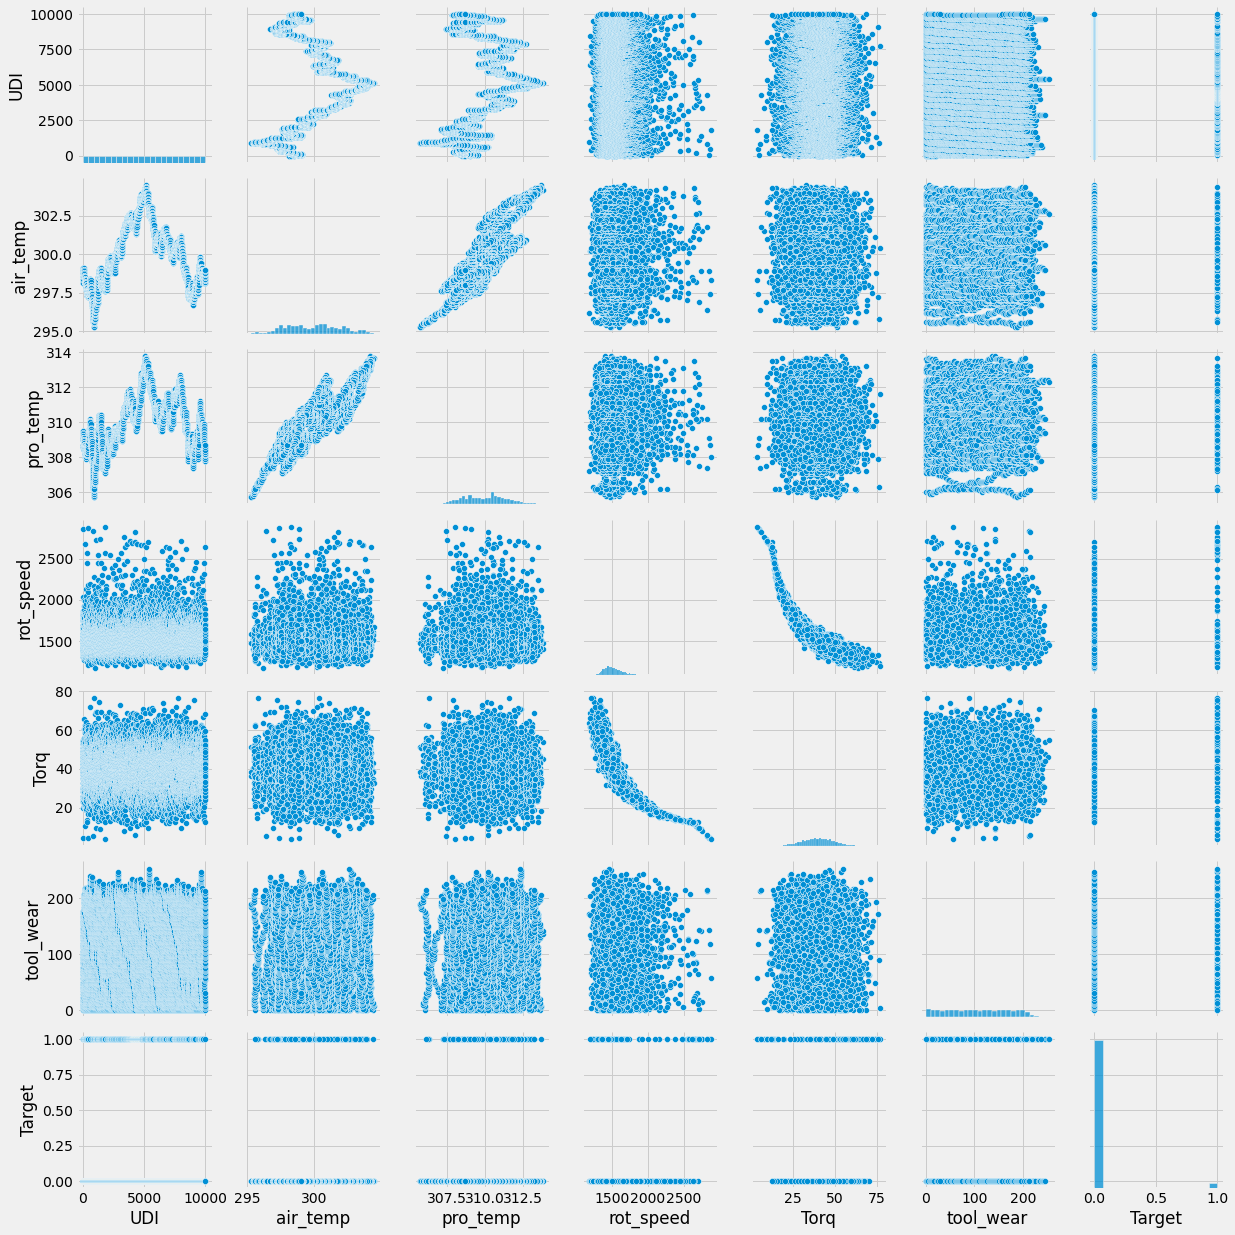

In [0]:
import seaborn as sns

sns.pairplot(pdf)

Out[174]: <AxesSubplot:>

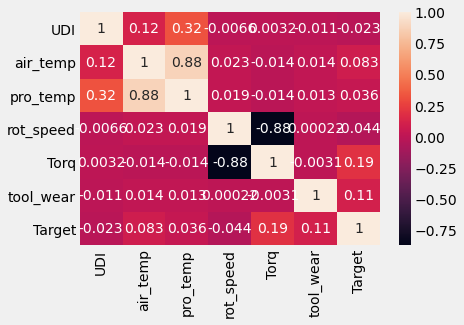

In [0]:
import matplotlib.pyplot as plt

sns.heatmap(pdf.corr(), annot=True)

Evendently, torque and rotation speed were found to be correlated with each other. Relations like these can lead to multicolinearity problems, however the correlation between these two (torque and rotation speed) is not very high. UDI will be dropped as it contains no value in relation to environmental condition of the machine (UID - Unique Device ID).

Out[175]: <AxesSubplot:xlabel='pro_temp', ylabel='Count'>

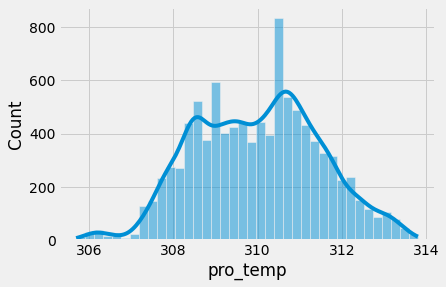

In [0]:
sns.histplot(pdf["pro_temp"],kde=True)


Out[176]: <AxesSubplot:xlabel='air_temp', ylabel='Count'>

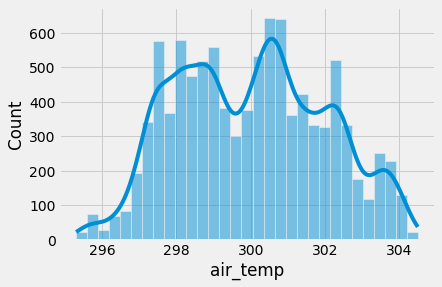

In [0]:
sns.histplot(pdf["air_temp"],kde=True)


Out[177]: <AxesSubplot:xlabel='rot_speed', ylabel='Count'>

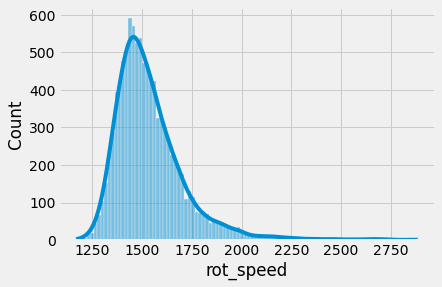

In [0]:
sns.histplot(pdf["rot_speed"],kde=True)


Out[178]: <AxesSubplot:xlabel='Torq', ylabel='Count'>

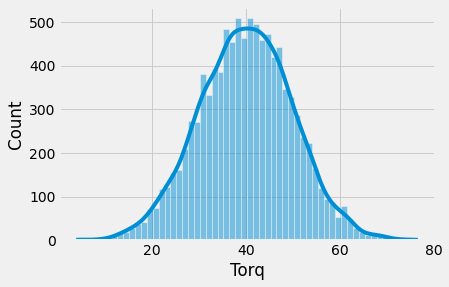

In [0]:
sns.histplot(pdf["Torq"],kde=True)


Looking at the distribution of Torque and rotation speed, we can say that Torque would prove to be a better variable for training purposes.

# 4. Data Cleaning and transformation

We renamed several columns to be more readable than what the CSV had originally. And later we removed a few of the variables such as Product ID, Type and UDI because they seemed to be less important in determining the likelihood of machine failure. 

A spot check was performed in order to identify any missing or wrongly entered values, however no unusual loss or 0 values were noticed in the dataset. Since this dataset was synthetic in nature, no cleaning or transformation operation was required. This means we could focus more on finding the right combination of features we wanted our model to be trained with.

In [0]:
df = df.withColumnRenamed("Product ID","Product_ID")
df = df.withColumnRenamed("Air temperature [K]","air_temp")
df = df.withColumnRenamed("Process temperature [K]","pro_temp")
df = df.withColumnRenamed("Rotational speed [rpm]","rot_speed")
df = df.withColumnRenamed("Torque [Nm]","Torq")
df = df.withColumnRenamed("Tool Wear [min]","tool_wear")
df = df.withColumnRenamed("Failure Type","fail_type")


pdf = df.toPandas()
for i in df.columns: #Spot check for zero values
  print(i, 'is zero:', df.where('{} = 0'.format(i)).count())

UDI is zero: 0
Product_ID is zero: 0
Type is zero: 0
air_temp is zero: 0
pro_temp is zero: 0
rot_speed is zero: 0
Torq is zero: 0
tool_wear is zero: 120
Target is zero: 9661
fail_type is zero: 0


# 5. Data Modeling

We used a pipeline to create our models. It allowed us to create our three models with much less lines of code than if we had coded them individually.

In [0]:
train_data, test_data  = df.randomSplit([0.6, 0.4], 24)   # proportions [], seed for random

print("Number of training records: " + str(train_data.count()))
print("Number of testing records : " + str(test_data.count()))

Number of training records: 6000
Number of testing records : 4000


In [0]:
from pyspark.ml.feature import VectorAssembler,RFormula
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier, NaiveBayes
from pyspark.ml import Pipeline, Model
from pyspark.ml.evaluation import RegressionEvaluator, BinaryClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder 

columns = df.columns

columns.remove('Product_ID')
columns.remove('fail_type')
columns.remove('UDI')
columns.remove('Type')
columns.remove('Target')


# with RFormula
formula = "{} ~ {}".format("Target", " + ".join(columns))
print("Formula : {}".format(formula))
rformula = RFormula(formula = formula)

# Pipeline basic to be shared across model fitting and testing
pipeline = Pipeline(stages=[])  # Must initialize with empty list!

# base pipeline (the processing here should be reused across pipelines)
basePipeline =[rformula]

#############################################################
# Logistic Regression model
#############################################################

lr = LogisticRegression(maxIter=10)
pl_lr = basePipeline + [lr]
pg_lr = ParamGridBuilder()\
          .baseOn({pipeline.stages: pl_lr})\
          .addGrid(lr.regParam,[0.01, .04])\
          .addGrid(lr.elasticNetParam,[0.1, 0.4])\
          .build()

#############################################################
# Random Forest Classifier model
#############################################################

rf = RandomForestClassifier(numTrees=50)
pl_rf = basePipeline + [rf]
pg_rf = ParamGridBuilder()\
      .baseOn({pipeline.stages: pl_rf})\
      .build()

#############################################################
# NaiveBayes model
#############################################################

nb = NaiveBayes()
pl_nb = basePipeline + [nb]
pg_nb = ParamGridBuilder()\
      .baseOn({pipeline.stages: pl_nb})\
      .addGrid(nb.smoothing,[0.4,1.0])\
      .build()


# One grid from the individual grids
paramGrid = pg_lr + pg_rf + pg_nb

Formula : Target ~ air_temp + pro_temp + rot_speed + Torq + tool_wear


Cross Validation

In [0]:
# The regression metric can be mse, rmse, mae, r2
# See the metrics here https://spark.apache.org/docs/latest/mllib-evaluation-metrics.html#regression-model-evaluation
# Should run more than 3 folds, but here we simplify so that it will complete
cv = CrossValidator()\
      .setEstimator(pipeline)\
      .setEvaluator(BinaryClassificationEvaluator())\
      .setEstimatorParamMaps(paramGrid)\
      .setNumFolds(3)

cvModel = cv.fit(train_data.limit(500))

/databricks/spark/python/pyspark/ml/util.py:839: UserWarning: Cannot find mlflow module. To enable MLflow logging, install mlflow from PyPI.
  warnings.warn(_MLflowInstrumentation._NO_MLFLOW_WARNING)


# 6. Model Prediction and discovery

Here our Random Forest model performed the best. Although our other models performed well too. Based on the correlation table certain values were dropped to see if the accuracy of the models can be improved, however it was clear after subsequent trials that the features that yielded the best results were air temperature, process temperature, rotation speed, torque and tool wear. 

Discovery: This goes to show, even though process and room temperature intutively and statistically carry some correlation, the machine learning models were able to extract information to provide significant accuracy difference as compared to the case when either one was used instead. Similarly, incase of rotation speed and torque the models trained better when both features were included than just one of the two.

We learnt that expanding the modeling paradigm helps improve our accuracy, however including more information does not always translate to high accuracy. For example, incase of "Type" feature - including "Type" drastically reduced our accuracy. We believe the reason could be skewness in data. Given the low volume of data entries balancing the dataset to remove biases would prove to be coercive, leaving the model a small amount of data to train. 

This helped us identify 5 features that will be important in determining machine failure with a high level of accuracy.

We recommend to use the Random Forest model in the future to help predict when machines will fail.

In [0]:
import numpy as np
# BinaryClassificationEvaluator defaults to ROC AUC, so higher is better
# http://gim.unmc.edu/dxtests/roc3.htm
print("Best Model")
print(cvModel.getEstimatorParamMaps()[ np.argmax(cvModel.avgMetrics) ])
print("Worst Model")
print (cvModel.getEstimatorParamMaps()[ np.argmin(cvModel.avgMetrics) ])

Best Model
{Param(parent='Pipeline_46cebec2cc5b', name='stages', doc='a list of pipeline stages'): [RFormula_b55a902d23c8, RandomForestClassifier_3cc6237f5de6]}
Worst Model
{Param(parent='Pipeline_46cebec2cc5b', name='stages', doc='a list of pipeline stages'): [RFormula_b55a902d23c8, NaiveBayes_091deeedcf7a], Param(parent='NaiveBayes_091deeedcf7a', name='smoothing', doc='The smoothing parameter, should be >= 0, default is 1.0'): 0.4}


In [0]:
import re
def paramGrid_model_name(model):
  params = [v for v in model.values() if type(v) is not list]
  name = [v[-1] for v in model.values() if type(v) is list][0]
  name = re.match(r'([a-zA-Z]*)', str(name)).groups()[0]
  return "{}{}".format(name,params)

# Resulting metric and model description
# get the measure from the CrossValidator, cvModel.avgMetrics
# get the model name & params from the paramGrid
# put them together here:
measures = zip(cvModel.avgMetrics, [paramGrid_model_name(m) for m in paramGrid])
metrics,model_names = zip(*measures)

<Figure size 432x288 with 0 Axes>

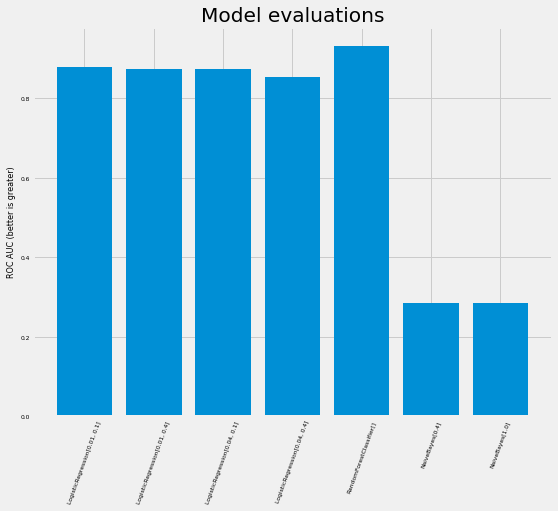

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.clf() # clear figure
fig = plt.figure( figsize=(9, 9))
plt.style.use('fivethirtyeight')
axis = fig.add_axes([0.1, 0.3, 0.8, 0.6])
# plot the metrics as Y

plt.bar(range(len(model_names)),metrics)
# plot the model name & param as X labels
plt.xticks(range(len(model_names)), model_names, rotation=70, fontsize=6)
plt.yticks(fontsize=6)
#plt.xlabel('model',fontsize=8)
plt.ylabel('ROC AUC (better is greater)',fontsize=8)
plt.title('Model evaluations')
display(plt.show())

# Run Best model

In [0]:
predictions = cvModel.transform(test_data)
display(predictions.select('label', 'prediction').limit(100))

label,prediction
0.0,0.0
0.0,0.0
0.0,0.0
0.0,0.0
0.0,0.0
0.0,0.0
0.0,0.0
0.0,0.0
0.0,0.0
0.0,0.0


In [0]:
from pyspark.mllib.evaluation import BinaryClassificationMetrics
# https://spark.apache.org/docs/latest/mllib-evaluation-metrics.html
# Compute raw scores on the test set
predictionAndLabels = predictions.select('prediction','label').rdd

# Instantiate metrics object
metrics = BinaryClassificationMetrics(predictionAndLabels)

# Area under precision-recall curve
print("Area under PR = %s" % metrics.areaUnderPR)

# Area under ROC curve
print("Area under ROC = %s" % metrics.areaUnderROC)

Area under PR = 0.24586964312102852
Area under ROC = 0.6297824123047463


# Best model predictions

As you can see below, there were 134 instances when a failure actually occurs. Our model was able to predict 131 of those instances, good for 75.37% accuracy in terms of just predicting failure.

There were 3,899 instances where failure does not actually occur. We predicted there would be 3,866 instances. Our model had 33 instacnes where it should have predicted failure when it didn't.

Overall, there were 4,000 instances in total. We misclassified 33 instances.

In [0]:
counts = [predictions.where('Target=1').count(), 
          predictions.where('prediction=1').count(),
          predictions.where('Target=0').count(), 
          predictions.where('prediction=0').count()]
names = ['actual 1', 'predicted 1', 'actual 0', 'predicted 0']
display(sqlContext.createDataFrame(zip(names,counts),['Measure','Value']))

Measure,Value
actual 1,134
predicted 1,101
actual 0,3866
predicted 0,3899
